## PyEDM Workshop
### Alessandra Camassa acamassa@salk.edu
___________________________________________________________________

### Install an import pyEDM
follow the instructions on 
https://pypi.org/project/pyEDM/ for installation

In [58]:
# import pyEDM package
import pyEDM
from pyEDM import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [59]:
solver = LinearRegression()

In [2]:
print(pyEDM.__version__)

2.0.1


### Using example data
Import pandas library to load your data.
In this example, we use the data that are included in the pyEDM package

In [3]:
import pandas as pd

data=pd.read_csv('/Users/iuliarusu/miniconda3/envs/SSR/lib/python3.11/site-packages/pyEDM/data/TentMap.csv')
data

Time  TentMap
0       1 -0.09920
1       2 -0.60130
2       3  0.79980
3       4 -0.79441
4       5  0.79800
..    ...      ...
994   995 -0.69848
995   996  0.77053
996   997 -1.20288
997   998  0.91498
998   999  0.16928

[999 rows x 2 columns]

### Using your own data
If you want to use your own data this is what you need to do:
1. load data as DataFrame using pandas e.g. https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/
2. if your data is in a different format you can load them as an array and then convert them into a DataFrame https://www.geeksforgeeks.org/convert-a-numpy-array-to-pandas-dataframe-with-headers/
3. the first column of the DataFrame must be Time, you can add a time column using: 
data.insert(loc=0, column='time', value=np.arange(0,len(data),1))
4. make sure that the columns names in your DataFrame are strings, you can check it running data.columns(), otherwise convert it using: 
column_mapping = {column: str(column) for column in data.columns}
data.rename(columns=column_mapping, inplace=True)

In [4]:
#import worm0 data
AVA = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_0_df.csv')  
RME = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_0_df.csv') 
SMDD =  pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_0_df.csv') 
SMDV = pd.read_csv('/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_0_df.csv')

In [5]:
#restructure AVA df, move cell id column over to 
# Step 1: Extract the first column and save it
cell_ids_AVA = AVA['Unnamed: 0']

# Step 2: Drop the first column from the original position
AVA = AVA.drop('Unnamed: 0', axis=1)

# Step 3: Append it to the end of the DataFrame
AVA['Cell IDs'] = cell_ids_AVA

AVA

0         1         2         3         4         5         6  \
0  0.976775  0.991876  0.959301  0.965111  1.000000  0.866721  0.973716   
1  1.000000  0.935644  0.849705  0.845024  0.842825  0.796130  0.830378   
2  0.357071  0.302537  0.253296  0.266410  0.504638  0.212432  0.481413   
3  1.000000  0.991301  0.970714  0.913606  0.962348  0.770225  0.882988   
4  0.435547  0.494692  0.572167  0.518893  0.540548  0.472929  0.524658   
5  0.368697  0.338778  0.408448  0.302089  0.610581  0.311618  0.641958   
6  1.000000  0.907780  0.950704  0.868841  0.454852  0.864822  0.471366   
7  1.000000  0.983741  0.959779  0.891268  0.818271  0.875687  0.807193   
8  0.000000  0.000000  0.000000  0.000000  0.201471  0.026253  0.214798   
9  0.163735  0.104371  0.173499  0.145530  0.820085  0.164703  0.779222   

          7         8         9  ...      1593      1594      1595      1596  \
0  0.923286  0.930305  0.918496  ...  0.476172  0.437171  0.449895  0.442183   
1  0.804948  0.761474  0.780609  ...  0.342765  0.340209  0.350782  0.289997   
2  0.422450  0.463587  0.386787  ...  0.150671  0.135206  0.139077  0.131533   
3  0.839908  0.848089  0.769599  ...  0.561755  0.543520  0.564684  0.517897   
4  0.468610  0.459972  0.499009  ...  0.472356  0.629316  0.518060  0.536051   
5  0.510804  0.655956  0.548551  ...  0.590133  0.561827  0.584820  0.564539   
6  0.459478  0.546006  0.481170  ...  0.199157  0.194401  0.153420  0.203703   
7  0.862939  0.869659  0.790130  ...  0.452028  0.461888  0.485556  0.533705   
8  0.208118  0.202661  0.196836  ...  0.151321  0.176422  0.174176  0.190206   
9  0.821134  0.767298  0.779898  ...  0.599148  0.575772  0.559780  0.613770   

       1597      1598      1599  worm_id  stim_group  Cell IDs  
0  0.454118  0.467614  0.439026        0           0         1  
1  0.341319  0.324467  0.307941        0           0         2  
2  0.164254  0.132973  0.107231        0           0        10  
3  0.523876  0.520129  0.533083        0           0        18  
4  0.488417  0.513189  0.515879        0           0        32  
5  0.541555  0.558282  0.613688        0           0        42  
6  0.198293  0.195993  0.183144        0           0        52  
7  0.474347  0.456104  0.454341        0           0        55  
8  0.154010  0.122249  0.098073        0           0        67  
9  0.607635  0.629501  0.545298        0           0        82  

[10 rows x 1603 columns]

In [6]:
#transpose, and add a time column
AVA = AVA.iloc[:, :-3]
AVA



0         1         2         3         4         5         6  \
0  0.976775  0.991876  0.959301  0.965111  1.000000  0.866721  0.973716   
1  1.000000  0.935644  0.849705  0.845024  0.842825  0.796130  0.830378   
2  0.357071  0.302537  0.253296  0.266410  0.504638  0.212432  0.481413   
3  1.000000  0.991301  0.970714  0.913606  0.962348  0.770225  0.882988   
4  0.435547  0.494692  0.572167  0.518893  0.540548  0.472929  0.524658   
5  0.368697  0.338778  0.408448  0.302089  0.610581  0.311618  0.641958   
6  1.000000  0.907780  0.950704  0.868841  0.454852  0.864822  0.471366   
7  1.000000  0.983741  0.959779  0.891268  0.818271  0.875687  0.807193   
8  0.000000  0.000000  0.000000  0.000000  0.201471  0.026253  0.214798   
9  0.163735  0.104371  0.173499  0.145530  0.820085  0.164703  0.779222   

          7         8         9  ...      1590      1591      1592      1593  \
0  0.923286  0.930305  0.918496  ...  0.435255  0.449743  0.472877  0.476172   
1  0.804948  0.761474  0.780609  ...  0.365326  0.362794  0.330972  0.342765   
2  0.422450  0.463587  0.386787  ...  0.137553  0.140512  0.156987  0.150671   
3  0.839908  0.848089  0.769599  ...  0.579833  0.568153  0.548295  0.561755   
4  0.468610  0.459972  0.499009  ...  0.511471  0.568465  0.426294  0.472356   
5  0.510804  0.655956  0.548551  ...  0.601427  0.568871  0.583311  0.590133   
6  0.459478  0.546006  0.481170  ...  0.259769  0.172923  0.234148  0.199157   
7  0.862939  0.869659  0.790130  ...  0.474924  0.427026  0.485298  0.452028   
8  0.208118  0.202661  0.196836  ...  0.189350  0.165176  0.178086  0.151321   
9  0.821134  0.767298  0.779898  ...  0.583219  0.655794  0.547780  0.599148   

       1594      1595      1596      1597      1598      1599  
0  0.437171  0.449895  0.442183  0.454118  0.467614  0.439026  
1  0.340209  0.350782  0.289997  0.341319  0.324467  0.307941  
2  0.135206  0.139077  0.131533  0.164254  0.132973  0.107231  
3  0.543520  0.564684  0.517897  0.523876  0.520129  0.533083  
4  0.629316  0.518060  0.536051  0.488417  0.513189  0.515879  
5  0.561827  0.584820  0.564539  0.541555  0.558282  0.613688  
6  0.194401  0.153420  0.203703  0.198293  0.195993  0.183144  
7  0.461888  0.485556  0.533705  0.474347  0.456104  0.454341  
8  0.176422  0.174176  0.190206  0.154010  0.122249  0.098073  
9  0.575772  0.559780  0.613770  0.607635  0.629501  0.545298  

[10 rows x 1600 columns]

In [7]:

# Transpose AVA
AVA_time = AVA.T
AVA_time.columns = cell_ids_AVA



In [8]:
AVA_time

Unnamed: 0        1         2         10        18        32        42  \
0           0.976775  1.000000  0.357071  1.000000  0.435547  0.368697   
1           0.991876  0.935644  0.302537  0.991301  0.494692  0.338778   
2           0.959301  0.849705  0.253296  0.970714  0.572167  0.408448   
3           0.965111  0.845024  0.266410  0.913606  0.518893  0.302089   
4           1.000000  0.842825  0.504638  0.962348  0.540548  0.610581   
...              ...       ...       ...       ...       ...       ...   
1595        0.449895  0.350782  0.139077  0.564684  0.518060  0.584820   
1596        0.442183  0.289997  0.131533  0.517897  0.536051  0.564539   
1597        0.454118  0.341319  0.164254  0.523876  0.488417  0.541555   
1598        0.467614  0.324467  0.132973  0.520129  0.513189  0.558282   
1599        0.439026  0.307941  0.107231  0.533083  0.515879  0.613688   

Unnamed: 0        52        55        67        82  
0           1.000000  1.000000  0.000000  0.163735  
1           0.907780  0.983741  0.000000  0.104371  
2           0.950704  0.959779  0.000000  0.173499  
3           0.868841  0.891268  0.000000  0.145530  
4           0.454852  0.818271  0.201471  0.820085  
...              ...       ...       ...       ...  
1595        0.153420  0.485556  0.174176  0.559780  
1596        0.203703  0.533705  0.190206  0.613770  
1597        0.198293  0.474347  0.154010  0.607635  
1598        0.195993  0.456104  0.122249  0.629501  
1599        0.183144  0.454341  0.098073  0.545298  

[1600 rows x 10 columns]

In [9]:


AVA_time.columns = ['cell_' + str(col) for col in AVA_time.columns]

In [10]:
AVA_time

cell_1    cell_2   cell_10   cell_18   cell_32   cell_42   cell_52  \
0     0.976775  1.000000  0.357071  1.000000  0.435547  0.368697  1.000000   
1     0.991876  0.935644  0.302537  0.991301  0.494692  0.338778  0.907780   
2     0.959301  0.849705  0.253296  0.970714  0.572167  0.408448  0.950704   
3     0.965111  0.845024  0.266410  0.913606  0.518893  0.302089  0.868841   
4     1.000000  0.842825  0.504638  0.962348  0.540548  0.610581  0.454852   
...        ...       ...       ...       ...       ...       ...       ...   
1595  0.449895  0.350782  0.139077  0.564684  0.518060  0.584820  0.153420   
1596  0.442183  0.289997  0.131533  0.517897  0.536051  0.564539  0.203703   
1597  0.454118  0.341319  0.164254  0.523876  0.488417  0.541555  0.198293   
1598  0.467614  0.324467  0.132973  0.520129  0.513189  0.558282  0.195993   
1599  0.439026  0.307941  0.107231  0.533083  0.515879  0.613688  0.183144   

       cell_55   cell_67   cell_82  
0     1.000000  0.000000  0.163735  
1     0.983741  0.000000  0.104371  
2     0.959779  0.000000  0.173499  
3     0.891268  0.000000  0.145530  
4     0.818271  0.201471  0.820085  
...        ...       ...       ...  
1595  0.485556  0.174176  0.559780  
1596  0.533705  0.190206  0.613770  
1597  0.474347  0.154010  0.607635  
1598  0.456104  0.122249  0.629501  
1599  0.454341  0.098073  0.545298  

[1600 rows x 10 columns]

In [11]:
# Create the 'time' column values
time_values = np.arange(0, len(AVA_time), 1)

# Insert the 'time' column into the transposed DataFrame
AVA_time.insert(loc=0, column='Time', value=time_values)


In [12]:
AVA_time

Time    cell_1    cell_2   cell_10   cell_18   cell_32   cell_42  \
0        0  0.976775  1.000000  0.357071  1.000000  0.435547  0.368697   
1        1  0.991876  0.935644  0.302537  0.991301  0.494692  0.338778   
2        2  0.959301  0.849705  0.253296  0.970714  0.572167  0.408448   
3        3  0.965111  0.845024  0.266410  0.913606  0.518893  0.302089   
4        4  1.000000  0.842825  0.504638  0.962348  0.540548  0.610581   
...    ...       ...       ...       ...       ...       ...       ...   
1595  1595  0.449895  0.350782  0.139077  0.564684  0.518060  0.584820   
1596  1596  0.442183  0.289997  0.131533  0.517897  0.536051  0.564539   
1597  1597  0.454118  0.341319  0.164254  0.523876  0.488417  0.541555   
1598  1598  0.467614  0.324467  0.132973  0.520129  0.513189  0.558282   
1599  1599  0.439026  0.307941  0.107231  0.533083  0.515879  0.613688   

       cell_52   cell_55   cell_67   cell_82  
0     1.000000  1.000000  0.000000  0.163735  
1     0.907780  0.983741  0.000000  0.104371  
2     0.950704  0.959779  0.000000  0.173499  
3     0.868841  0.891268  0.000000  0.145530  
4     0.454852  0.818271  0.201471  0.820085  
...        ...       ...       ...       ...  
1595  0.153420  0.485556  0.174176  0.559780  
1596  0.203703  0.533705  0.190206  0.613770  
1597  0.198293  0.474347  0.154010  0.607635  
1598  0.195993  0.456104  0.122249  0.629501  
1599  0.183144  0.454341  0.098073  0.545298  

[1600 rows x 11 columns]

In [67]:
#save to csv
AVA_time.to_csv('AVA_time.csv', index=False)

### Always look at your data!! 
you can plot them using matplotlib, pandas, seaborn, plotly...

Text(0, 0.5, 'Values')

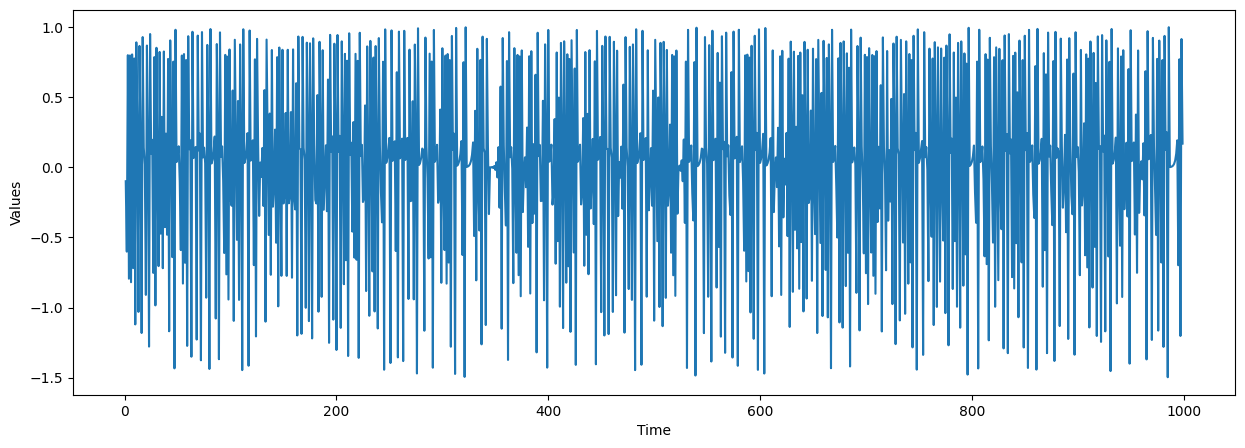

In [13]:
# plotting data with matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(data['Time'], data['TentMap'])
plt.xlabel('Time')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

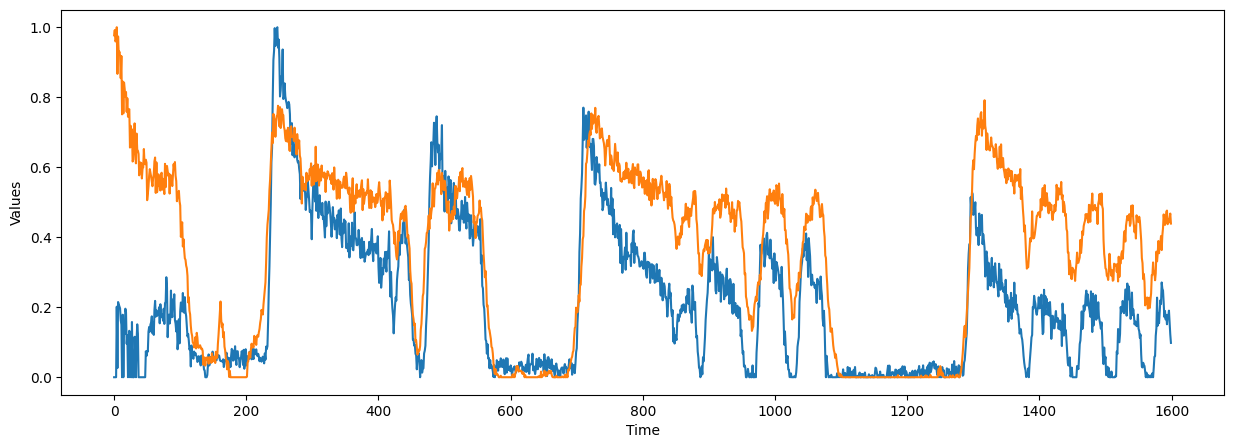

In [14]:
#look at data
plt.figure(figsize=(15,5))
plt.plot(AVA_time['Time'], AVA_time['cell_67'])
plt.plot(AVA_time['Time'], AVA_time['cell_1'])
plt.xlabel('Time')
plt.ylabel('Values')

# Estimate optimal embedding dimension
Do this for each of the columns in your DataFrame (e.g. for each neuron you record from)

In [15]:
from pyEDM import EmbedDimension

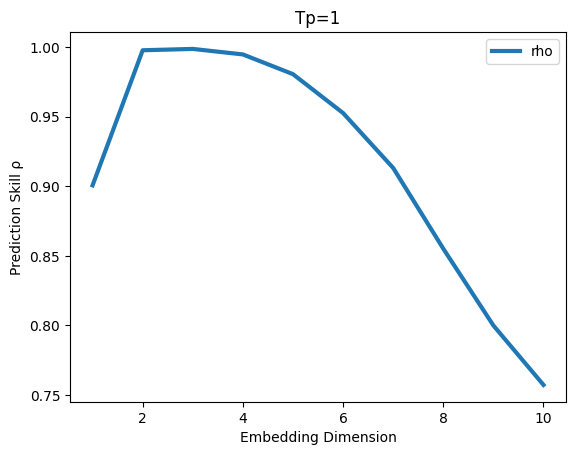

In [16]:
# use EmbedDimension from pyEDM package
# you can use half of your data as library: lib 
# and predict the other half of the data: pred
# the default is to test for E=1:10 but you can increase it using the maxE parameter 


out_E = EmbedDimension( dataFrame = data, lib = "1 500", pred = "501 999", 
                columns = "TentMap" , target = 'TentMap')
#added prediction target name, the name of the column you want to predict

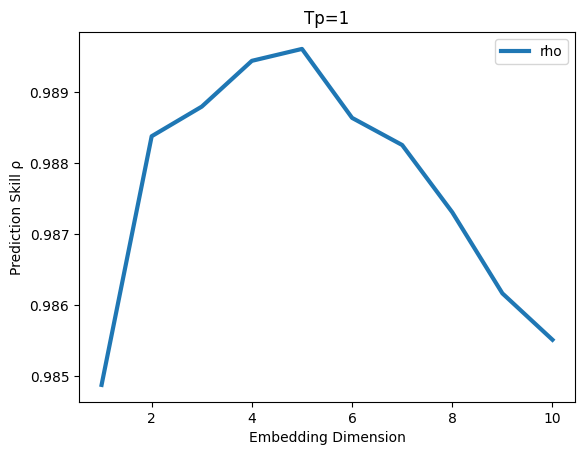

In [17]:
#out E for each column
out_E_AVA_cell_1 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_1" , target = 'cell_1')

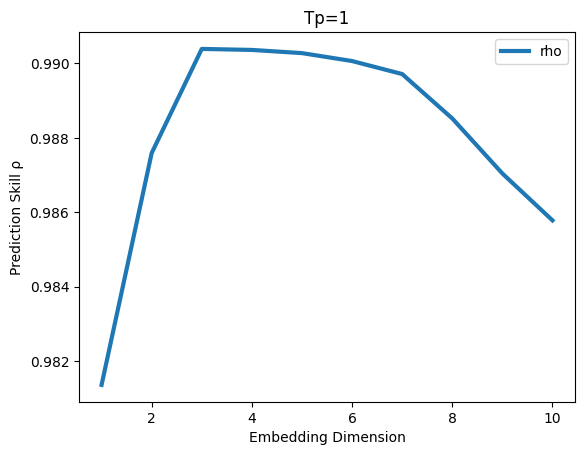

In [18]:
out_E_AVA_cell_2 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_2" , target = 'cell_2')

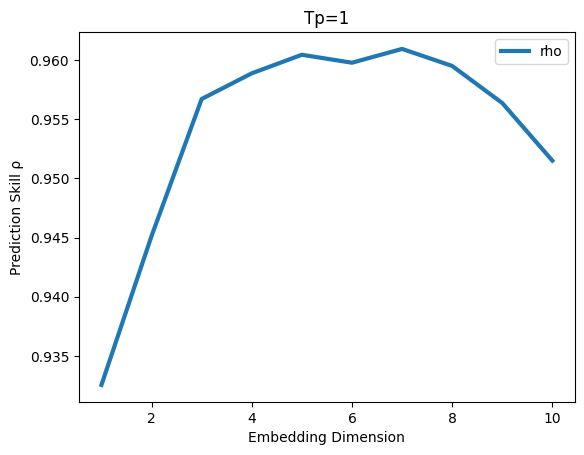

In [19]:
out_E_AVA_cell_10 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_10" , target = 'cell_10')

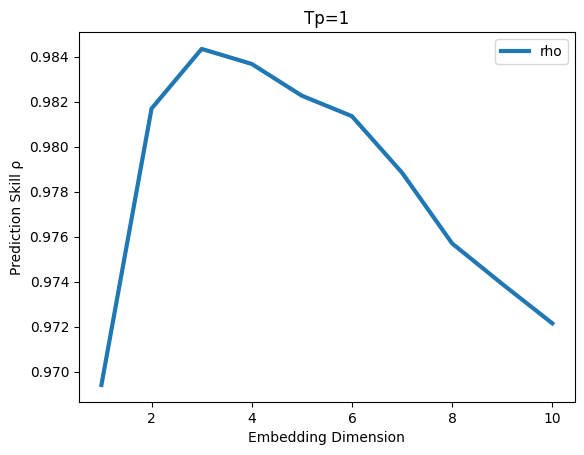

In [20]:
out_E_AVA_cell_18 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_18" , target = 'cell_18')

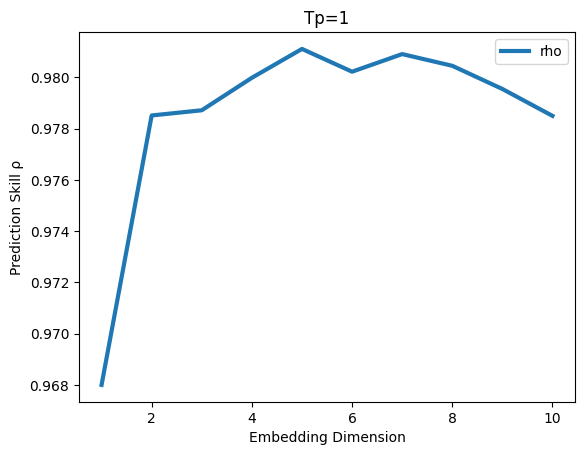

In [21]:
out_E_AVA_cell_32 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_32" , target = 'cell_32')

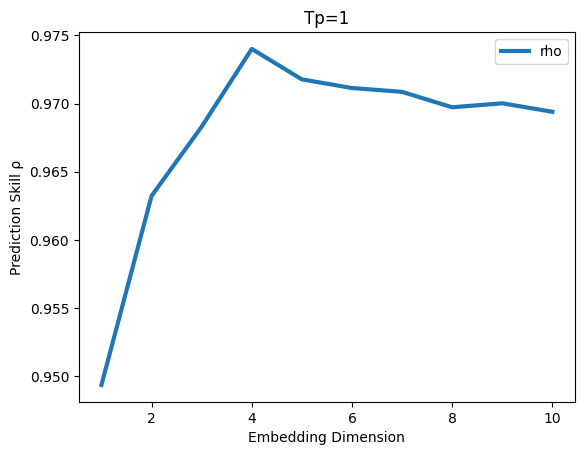

In [22]:
out_E_AVA_cell_42 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_42" , target = 'cell_42')

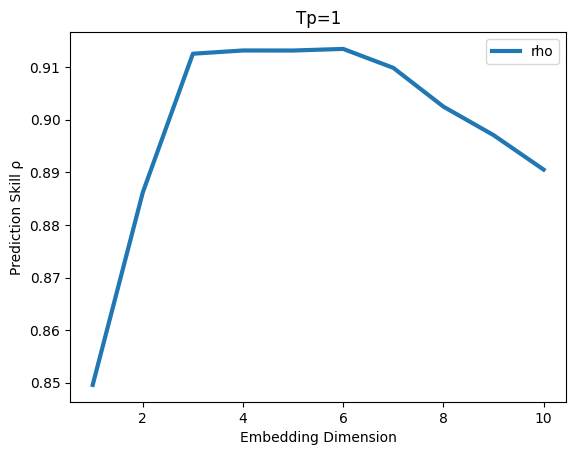

In [23]:
out_E_AVA_cell_52 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_52" , target = 'cell_52')

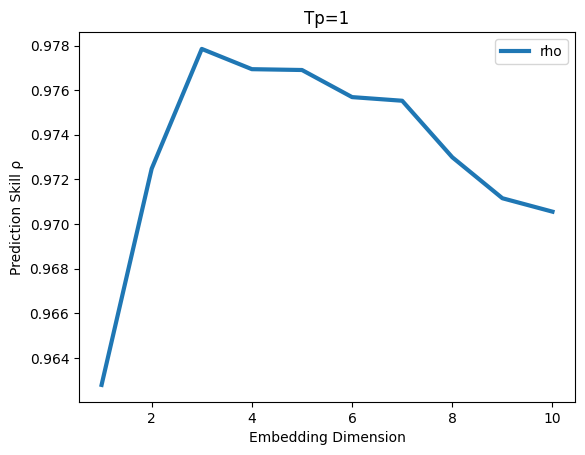

In [24]:
out_E_AVA_cell_55 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_55" , target = 'cell_55')

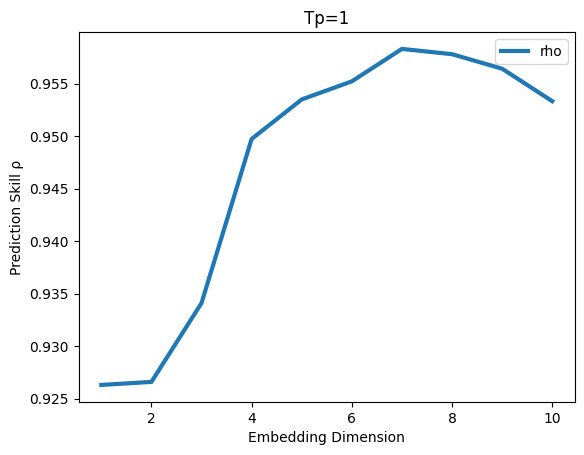

In [25]:
out_E_AVA_cell_67 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_67" , target = 'cell_67')

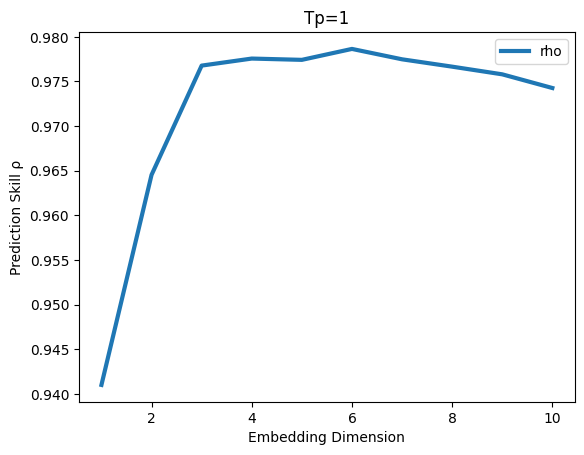

In [26]:
out_E_AVA_cell_82 = EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
                columns = "cell_82" , target = 'cell_82')

In [27]:
out_E_AVA_list = [out_E_AVA_cell_1, out_E_AVA_cell_2, out_E_AVA_cell_10, out_E_AVA_cell_18, out_E_AVA_cell_32, out_E_AVA_cell_42, out_E_AVA_cell_52, out_E_AVA_cell_55, out_E_AVA_cell_67, out_E_AVA_cell_82]

In [28]:
def max_rho_e(df):
    return df.loc[df['rho'].idxmax(), 'E']

# List comprehension to apply function to each DataFrame
max_e_values = [max_rho_e(df) for df in out_E_AVA_list]

# Calculate the average of these E values
average_e = sum(max_e_values) / len(max_e_values)

In [29]:
average_e

4.9

In [30]:
AVA_Estar = pd.DataFrame({
    'Cell IDs': cell_ids_AVA,
    'Max E Values': max_e_values
})


In [31]:
AVA_Estar 

Cell IDs  Max E Values
0         1             5
1         2             3
2        10             7
3        18             3
4        32             5
5        42             4
6        52             6
7        55             3
8        67             7
9        82             6

In [32]:
# the output of this function contains the values of rho (accuracy of the prediction) 
# for each value of E tested
out_E

E       rho
0   1  0.900582
1   2  0.997573
2   3  0.998533
3   4  0.994581
4   5  0.980414
5   6  0.952495
6   7  0.913073
7   8  0.855132
8   9  0.799997
9  10  0.757312

In [33]:
# the dimensionality of your data is the E that corresponds to maximum prediction skills (rho)
# you can call it E_star, that's the value you should use for the rest of the analysis
# you can obtain E_star using numpy as follows:

import numpy as np
E_star=out_E['E'][np.argmax(out_E['rho'])]
E_star=int(E_star)
print(E_star)

3


In [34]:

E_star_AVA_cell_1 =out_E_AVA_cell_1['E'][np.argmax(out_E_AVA_cell_1['rho'])]
E_star_AVA_cell_1=int(E_star_AVA_cell_1)
E_star_AVA_cell_1

5

simplex, and embedding dimmesion code assumes that tau = -1, as in going one step back in time

### Simplex prediction
here you are builing a E dimensional delay embedding of the variable in the selected column using lib time points, 
and using it to predict the future pred time points of that variable, see
https://sugiharalab.github.io/EDM_Documentation/algorithms_in_depth/

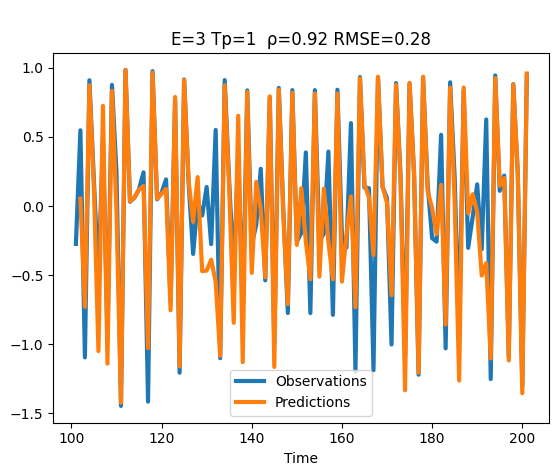

In [35]:
s = Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap", target = 'TentMap' , tau=-1, Tp=1, E = E_star, showPlot = True )

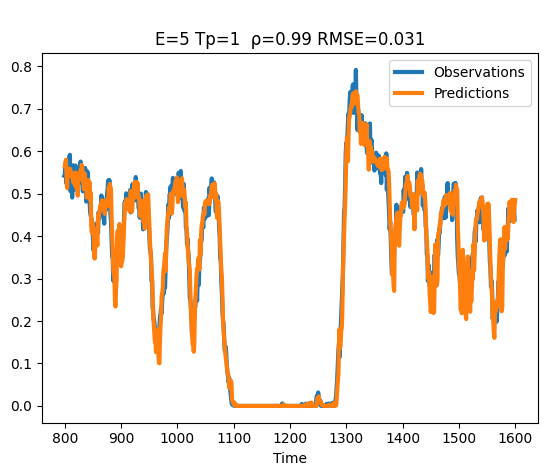

In [36]:
s = Simplex( dataFrame = AVA_time, lib = "1 799", pred = "800 1600", 
         columns = "cell_1", target = 'cell_1' , tau=-1, Tp=1, E = E_star_AVA_cell_1, showPlot = True )

In [37]:
s

Time  Observations  Predictions  Pred_Variance
0     799      0.541991          NaN            NaN
1     800      0.545436     0.564625       0.000640
2     801      0.571060     0.571323       0.000378
3     802      0.547535     0.579866       0.000547
4     803      0.523891     0.549354       0.000724
..    ...           ...          ...            ...
797  1596      0.442183     0.465025       0.001018
798  1597      0.454118     0.433002       0.002152
799  1598      0.467614     0.458570       0.001251
800  1599      0.439026     0.473100       0.000377
801  1600           NaN     0.485130       0.000979

[802 rows x 4 columns]

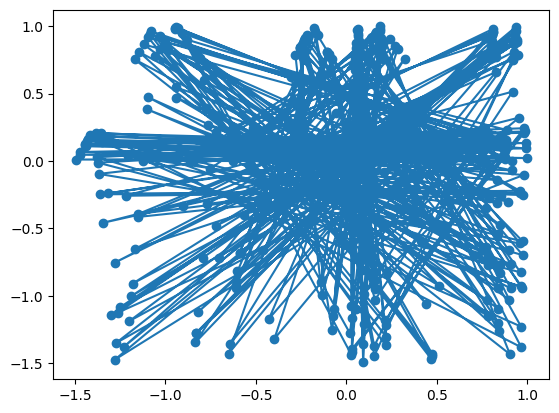

In [70]:
plt.figure()
plt.plot(t[:-4], t[4:], 'o-')

In [39]:
t = AVA_time['cell_1']

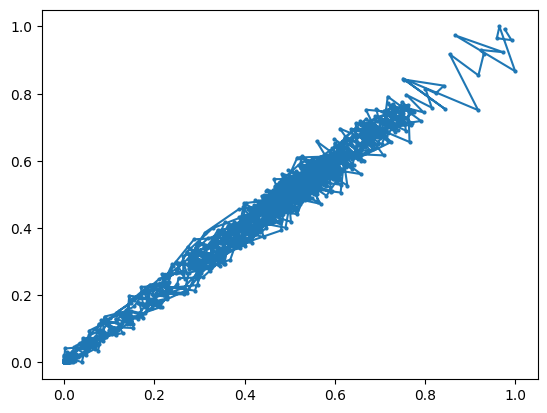

In [40]:
#plot tau = -1 SMAP for AVA cell 1

plt.figure()
plt.plot(t[:-1], t[1:], 'o-', markersize=2)

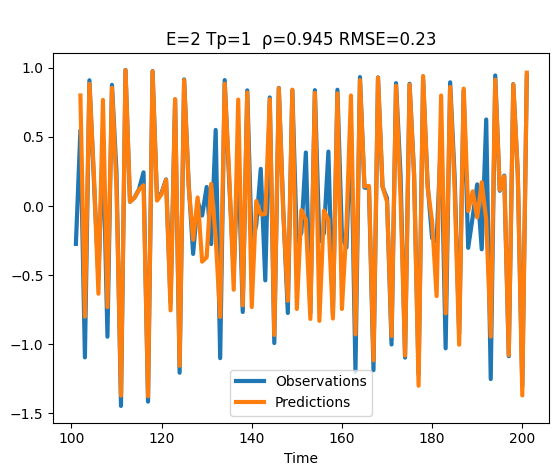

Time  Observations  Predictions  Pred_Variance
0     101      -0.27407          NaN            NaN
1     102       0.54787     0.799654   3.691268e-06
2     103      -1.09519    -0.800271   7.764214e-02
3     104       0.90979     0.884269   4.781520e-04
4     105       0.17961     0.223006   2.873564e-04
..    ...           ...          ...            ...
96    197      -1.08640    -1.078170   9.853841e-17
97    198       0.88162     0.879216   5.966475e-07
98    199       0.23569     0.239025   6.337134e-05
99    200      -1.30285    -1.370192   4.796500e-03
100   201       0.94361     0.964626   3.212216e-06

[101 rows x 4 columns]

In [41]:
Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap", target = 'TentMap', tau=-1, Tp=1, E = 2, showPlot = True )

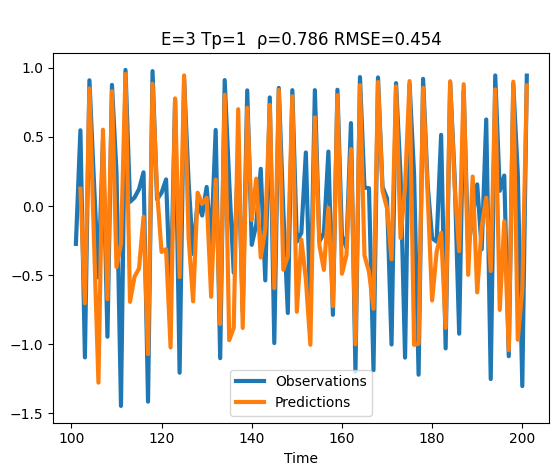

Time  Observations  Predictions  Pred_Variance
0     101      -0.27407          NaN            NaN
1     102       0.54787     0.125376       0.113385
2     103      -1.09519    -0.703836       0.062722
3     104       0.90979     0.850528       0.003746
4     105       0.17961    -0.236545       0.196189
..    ...           ...          ...            ...
96    197      -1.08640    -1.042754       0.004334
97    198       0.88162     0.899308       0.003620
98    199       0.23569    -0.967247       0.049355
99    200      -1.30285    -0.603776       0.174224
100   201       0.94361     0.872366       0.003264

[101 rows x 4 columns]

In [42]:
Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap", target = 'TentMap' , tau=-6, Tp=1, E = E_star, showPlot = True )

### Prediction Horizon
You can check the best predition horizon (Tp, i.e. how many time steps in the future you want to predict) 
for your data using PredictInterval from pyEDM

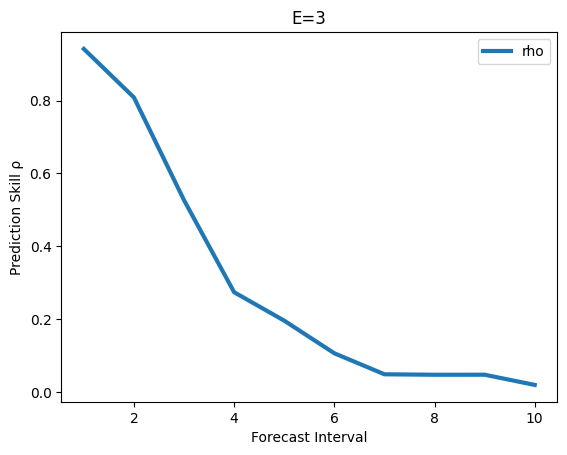

Tp       rho
0   1  0.942229
1   2  0.808921
2   3  0.526621
3   4  0.273761
4   5  0.195588
5   6  0.105950
6   7  0.048238
7   8  0.046933
8   9  0.047035
9  10  0.019006

In [43]:
PredictInterval( dataFrame = data, lib = "1 100", pred = "201 500",
                 columns = "TentMap",target = 'TentMap',  E = E_star)

#update the tau

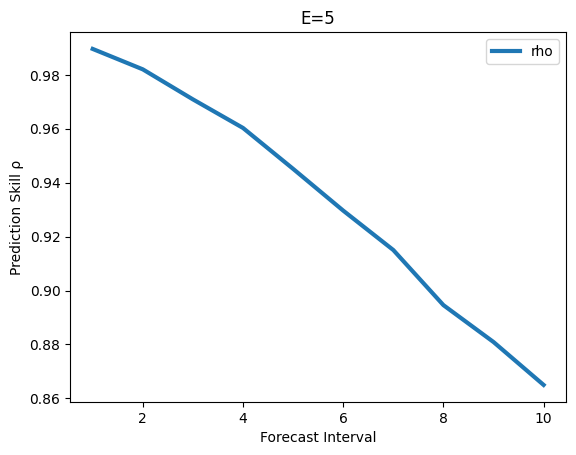

In [44]:
p = PredictInterval( dataFrame = AVA_time, lib = "1 799", pred = "800 1600",
                 columns = "cell_1",target = 'cell_1',  E = E_star_AVA_cell_1)



In [45]:
p

Tp       rho
0   1  0.989613
1   2  0.982037
2   3  0.970906
3   4  0.960303
4   5  0.945135
5   6  0.929648
6   7  0.915031
7   8  0.894600
8   9  0.880918
9  10  0.865004

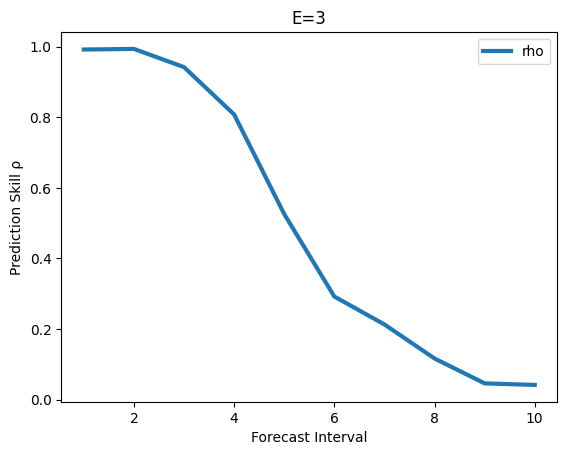

Tp       rho
0   1  0.991513
1   2  0.993205
2   3  0.941671
3   4  0.807653
4   5  0.525696
5   6  0.292175
6   7  0.213159
7   8  0.116796
8   9  0.046358
9  10  0.041972

In [46]:
#calculate the prediction interval (tp)
PredictInterval( dataFrame = data, lib = "1 100", pred = "201 500",
                 columns = "TentMap",target = 'TentMap',  E = E_star, tau = 1)


### Autocorrelation
it is a good practice to estimate the autocorrelaiton of your data
and compare the autocorrelation to the predictability at different time steps
you should use a Tp where rho is higher than autocorrelation


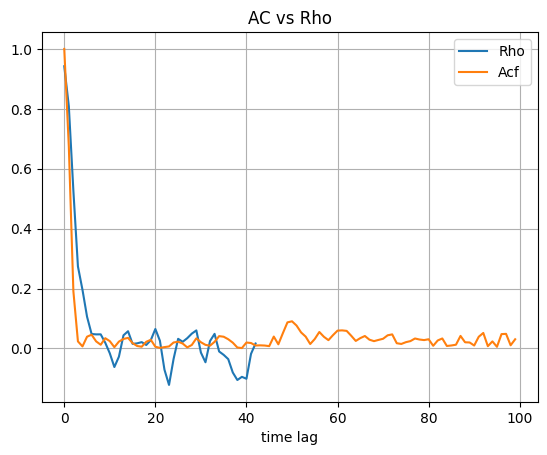

In [47]:
# compare autocorrelation and rho varying Tp

import statsmodels.api as sm
E_star=3
ac=sm.tsa.acf(data['TentMap'], nlags=99)
pred_int=PredictInterval( dataFrame = data, lib="1 100", pred="201 500",
                columns = 'TentMap', target = 'TentMap', E =E_star, maxTp=43, showPlot=False)

plt.figure()
plt.plot(pred_int['rho'])
plt.plot(abs(ac))
plt.title('AC vs Rho')
plt.grid()
plt.xlabel('time lag')
plt.legend(['Rho','Acf'])

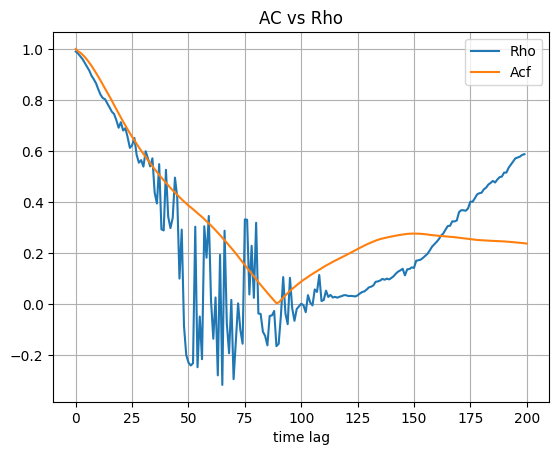

In [48]:
E_star=E_star_AVA_cell_1
ac=sm.tsa.acf(AVA_time['cell_1'], nlags=200)
pred_int=PredictInterval( dataFrame = AVA_time, lib="1 799", pred="800 1600",
                columns = 'cell_1', target = 'cell_1', E =E_star, maxTp=200, showPlot=False)

plt.figure()
plt.plot(pred_int['rho'])
plt.plot(abs(ac))
plt.title('AC vs Rho')
plt.grid()
plt.xlabel('time lag')
plt.legend(['Rho','Acf'])

### Selecting the best time shift tau
tau represents the time shift you apply to your data to build the delay embedding
you should check different values of tau to find the one that maximise the predictability of your data


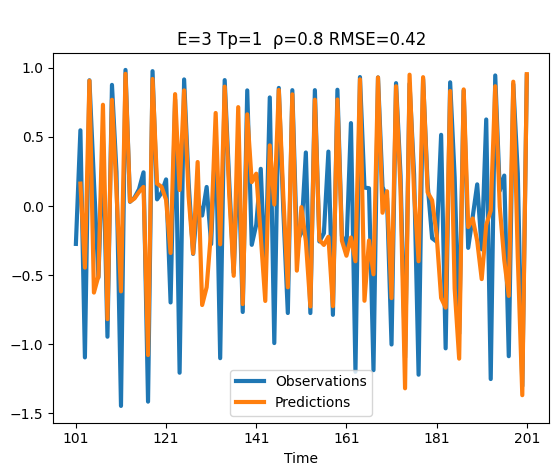

Time  Observations  Predictions  Pred_Variance
0    101      -0.27407          NaN            NaN
1    102       0.54787     0.162259       0.682638
2    103      -1.09519    -0.445601       0.338195
3    104       0.90979     0.906758       0.004010
4    105       0.17961    -0.626137       0.170738
..   ...           ...          ...            ...
96   197      -1.08640    -0.650257       0.449700
97   198       0.88162     0.899414       0.004612
98   199       0.23569    -0.370727       0.298695
99   200      -1.30285    -1.368586       0.000007
100  201       0.94361     0.953938       0.000255

[101 rows x 4 columns]

In [13]:
# testing tau = -2 
Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap",tau=-2, Tp=1, E = E_star, showPlot = True )
# see from the plot that in this case with tau=-2 the predictability decreases!

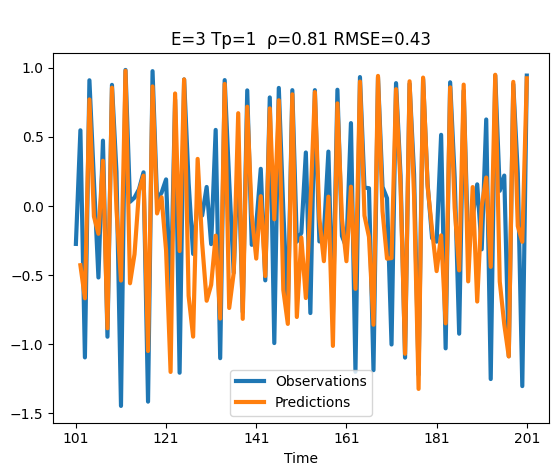

Time  Observations  Predictions  Pred_Variance
0    101      -0.27407          NaN            NaN
1    102       0.54787    -0.428186       0.348913
2    103      -1.09519    -0.667425       0.328756
3    104       0.90979     0.771164       0.045936
4    105       0.17961    -0.075510       0.136657
..   ...           ...          ...            ...
96   197      -1.08640    -1.088371       0.356414
97   198       0.88162     0.898255       0.004897
98   199       0.23569    -0.145041       0.191265
99   200      -1.30285    -0.258722       0.388944
100  201       0.94361     0.924045       0.001613

[101 rows x 4 columns]

In [14]:
# testing tau = -3
Simplex( dataFrame = data, lib = "1 100", pred = "101 200", 
         columns = "TentMap",tau=-3, Tp=1, E = E_star, showPlot = True )
# see from the plot that in this case with tau=-3 the predictability decreases!

### SMap
recommended for noisy or complex data, see
https://sugiharalab.github.io/EDM_Documentation/algorithms_in_depth/
https://sugiharalab.github.io/EDM_Documentation/SMap_Demo/

To use SMap, you need to know the E and tau to use. You find those with Simplex as we did before!
Pay attention to the new parameter theta!


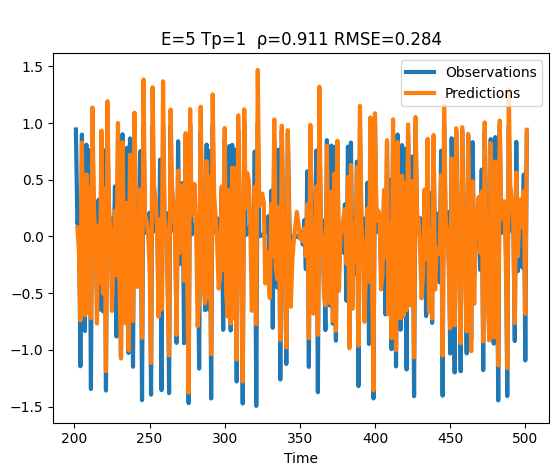

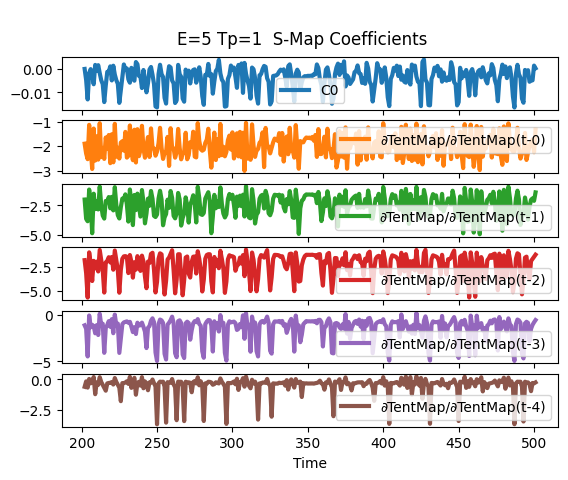

In [61]:
SMap( dataFrame = data, lib = "1 100", pred = "201 500", 
      columns = "TentMap", target = "TentMap", E = E_star, theta = 3, showPlot = True, solver = solver );

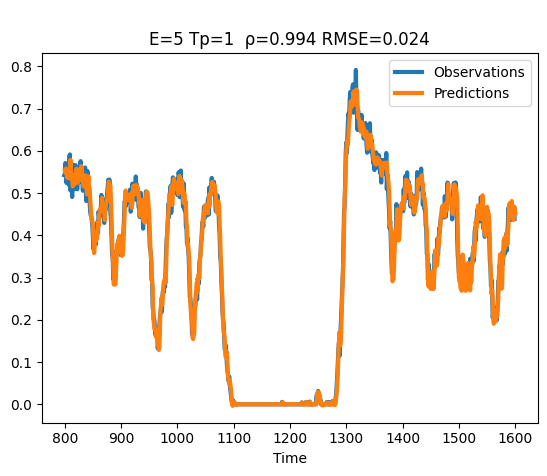

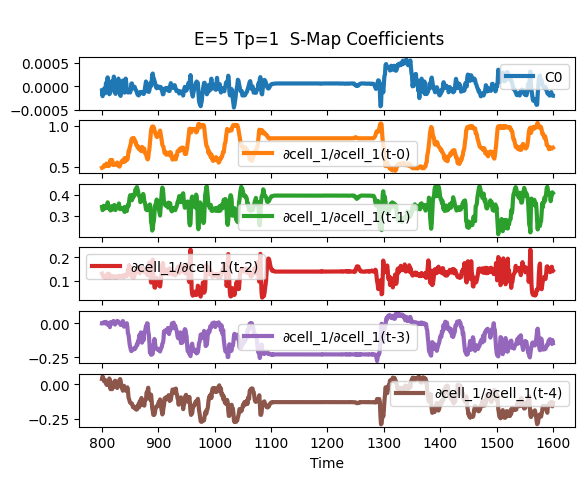

In [60]:
SMap( dataFrame = AVA_time, lib = "1 799", pred = "800 1600", 
      columns = "cell_1", target = "cell_1", E = E_star_AVA_cell_1, theta = 3, showPlot = True, solver = solver );

In [52]:
t = AVA_time['cell_1']

### Use PredictNonlinear
to find the optimal theta for your data
the optimal theta is the one that maximise yor prediction skills!

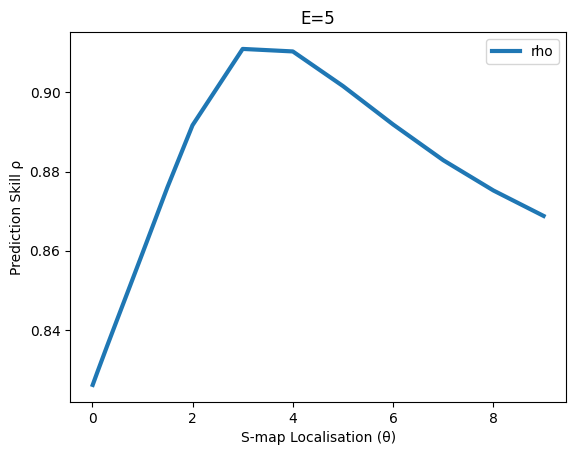

In [62]:
PredictNonlinear( dataFrame = data, lib = "1 100", pred = "201 500",
                  columns = "TentMap", target = "TentMap", E = E_star, solver = solver );
# see from the plot that in this case theta=4 is the best

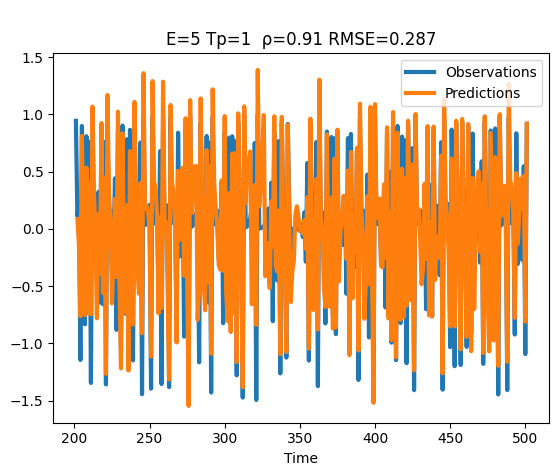

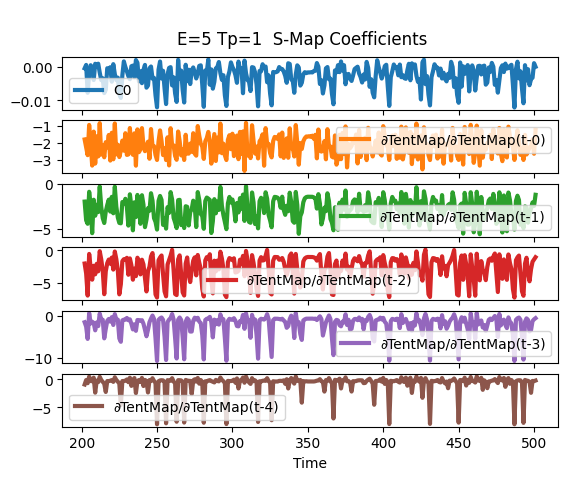

In [65]:
# repeat SMap computation with the theta you found in order to obtain the best prediction
SMap( dataFrame = data, lib = "1 100", pred = "201 500", 
      columns = "TentMap", target = 'TentMap', E = E_star, theta = 4, showPlot = True, solver = solver );
# notice that rho increased from 0.92 to 0.94 using the optimal theta!

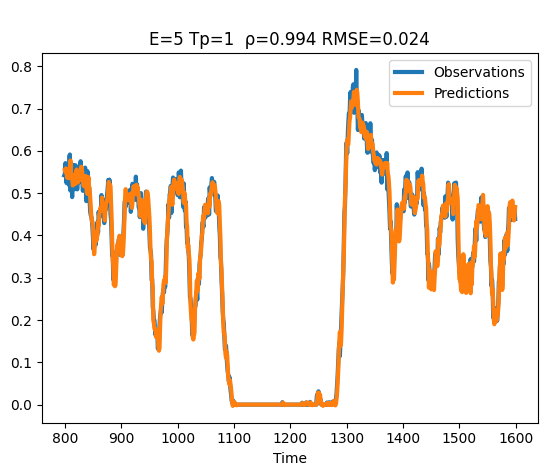

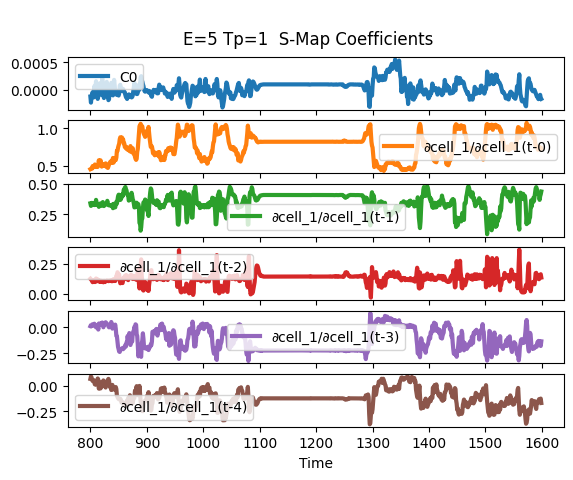

In [66]:
SMap( dataFrame = AVA_time, lib = "1 799", pred = "800 1599", 
      columns = "cell_1", target = "cell_1", E = E_star_AVA_cell_1, theta = 4, showPlot = True, solver = solver );

### Delay embedding
you can build a DataFrame containing the delay embedding of your variable using the functions
Embed or MakeBlock from pyEDM
you can use this to easily plot the Takens embedding manifold of your data

In [57]:
embedding=Embed(pathIn='/Users/acamassa/pyEDM/pyEDM/data/', dataFile='TentMap_rEDM.csv', 
      E=E_star, tau=-1, columns='TentMap')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/acamassa/pyEDM/pyEDM/data/TentMap_rEDM.csv'

In [19]:
embedding=MakeBlock(data, E=E_star_AVA_cell_1, tau=-1, columnNames=['TentMap'], deletePartial=False)

In [20]:
embedding

TentMap(t-0)  TentMap(t-1)  TentMap(t-2)
0        -0.09920           NaN           NaN
1        -0.60130      -0.09920           NaN
2         0.79980      -0.60130      -0.09920
3        -0.79441       0.79980      -0.60130
4         0.79800      -0.79441       0.79980
..            ...           ...           ...
994      -0.69848       0.19255       0.09632
995       0.77053      -0.69848       0.19255
996      -1.20288       0.77053      -0.69848
997       0.91498      -1.20288       0.77053
998       0.16928       0.91498      -1.20288

[999 rows x 3 columns]

In [68]:
embedding=Embed(pathIn='/Users/iuliarusu/Documents/Sejnowski/code/', dataFile='AVA_time.csv', 
      E=E_star_AVA_cell_1, tau=-1, columns='cell_1')

Text(0.5, 0, 'Cell 1 AVA(t-2)')

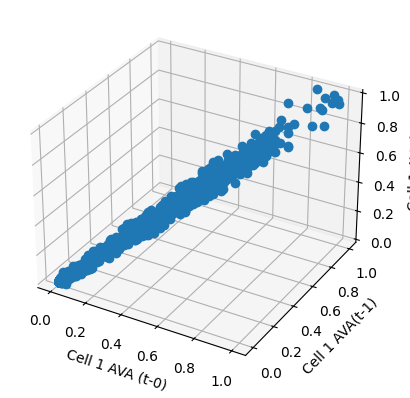

In [70]:
# plotting your manifold in 3 dimensions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(embedding['cell_1(t-0)'], embedding['cell_1(t-1)'], embedding['cell_1(t-1)'], 'o')
ax.set_xlabel('Cell 1 AVA (t-0)')
ax.set_ylabel('Cell 1 AVA(t-1)')
ax.set_zlabel('Cell 1 AVA(t-2)')


### Inference of causality via Convergent Cross Mapping (CCM)
here you are using variable 'x' to predict variavle 'y'
if the prediction is good, means that x and y are causally related. i.e. they belong to the same dynamical system
see https://sugiharalab.github.io/EDM_Documentation/algorithms_in_depth/

using this framework you can identify causal relations between variables in your data, e.g. two neurons causally related will have a high CCM value, same for
one neuron that causes a behavior etc.

In [91]:
# to do causal inference you need at least 2 variables, so we load another example dataset 

data=pd.read_csv('/Users/iuliarusu/miniconda3/envs/SSR/lib/python3.11/site-packages/pyEDM/data/sardine_anchovy_sst.csv')
data

year   anchovy   sardine   sio_sst    np_sst
0   1929 -0.007599  1.770090 -0.352393 -0.347846
1   1930 -0.009602 -1.151520  0.001149  0.328734
2   1931 -0.008444 -1.420680  1.068220  1.610270
3   1932 -0.008354  0.112222  0.531857  1.265340
4   1933 -0.007750  1.515550 -0.552058  0.040046
..   ...       ...       ...       ...       ...
73  2002 -0.741992  0.138018  0.658063 -1.186420
74  2003 -0.157825 -0.360649  0.634573 -1.342620
75  2004  0.249897  0.189861  1.219800 -0.530206
76  2005  0.213121 -0.130771  1.749450 -0.757965
77  2006  0.073090  0.229798  2.028610 -0.583363

[78 rows x 5 columns]

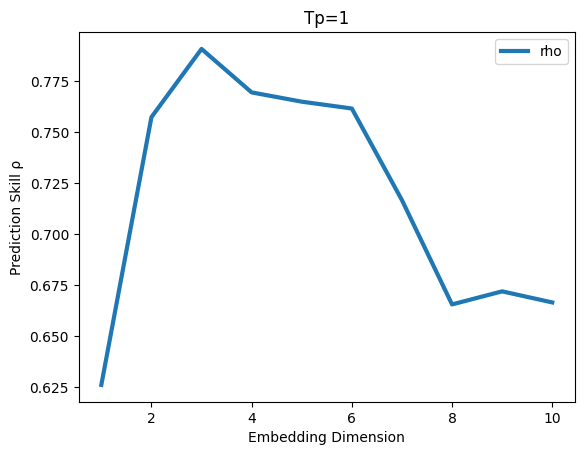

E       rho
0   1  0.626142
1   2  0.757497
2   3  0.790982
3   4  0.769651
4   5  0.765103
5   6  0.761751
6   7  0.716812
7   8  0.665638
8   9  0.672046
9  10  0.666614

In [93]:
# find the best parameters for this data
EmbedDimension( dataFrame = data, lib = "1 50", pred = "51 77", 
                columns = "np_sst" , target = "np_sst")

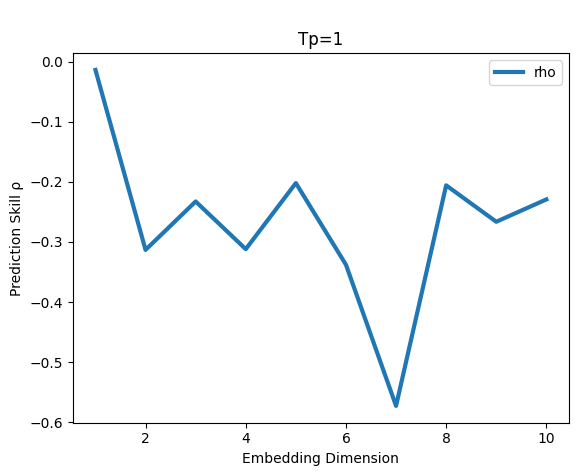

E       rho
0   1.0 -0.013988
1   2.0 -0.313169
2   3.0 -0.232687
3   4.0 -0.311908
4   5.0 -0.202091
5   6.0 -0.337827
6   7.0 -0.572572
7   8.0 -0.205843
8   9.0 -0.266408
9  10.0 -0.229249

In [24]:
# find the best parameters for this data
EmbedDimension( dataFrame = data, lib = "1 50", pred = "51 77", 
                columns = "sardine" )

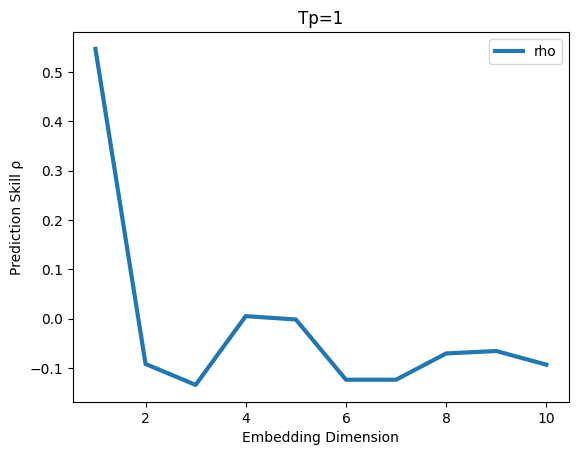

E       rho
0   1  0.546423
1   2 -0.092071
2   3 -0.134533
3   4  0.004924
4   5 -0.001955
5   6 -0.123966
6   7 -0.124010
7   8 -0.070746
8   9 -0.065822
9  10 -0.093472

In [95]:
# find the best parameters for this data
EmbedDimension( dataFrame = data, lib = "1 50", pred = "51 77", 
                columns = "anchovy", target = "anchovy") 

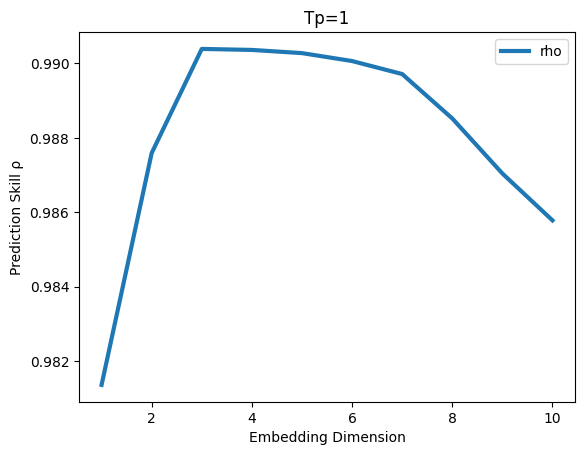

E       rho
0   1  0.981354
1   2  0.987589
2   3  0.990390
3   4  0.990363
4   5  0.990277
5   6  0.990064
6   7  0.989714
7   8  0.988520
8   9  0.987040
9  10  0.985779

In [72]:
EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1600", 
                columns = "cell_2", target = 'cell_2')

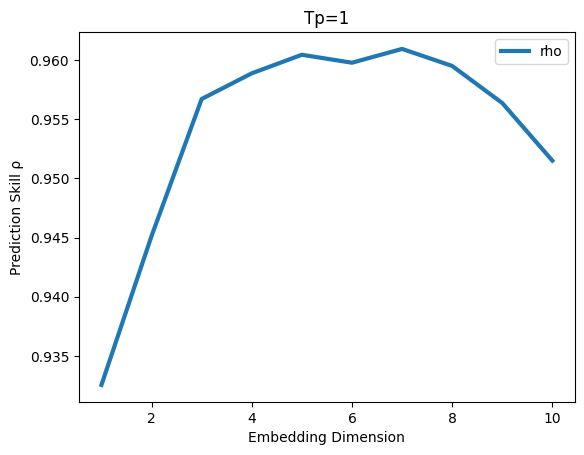

E       rho
0   1  0.932551
1   2  0.945132
2   3  0.956706
3   4  0.958876
4   5  0.960445
5   6  0.959772
6   7  0.960938
7   8  0.959501
8   9  0.956367
9  10  0.951501

In [73]:
EmbedDimension( dataFrame = AVA_time, lib = "1 799", pred = "800 1600", 
                columns = "cell_10", target = 'cell_10')

In [82]:
clusters = {'RME': RME, 'SMDD': SMDD, 'SMDV': SMDV}
processed_clusters = {}  # Dictionary to store processed data with names

for name, cluster in clusters.items():
    
    # Step 1: Capture the cell IDs
    cell_ids_cluster = cluster['Unnamed: 0']
    
    # Step 2: Drop the first column from the original DataFrame
    processed_cluster = cluster.drop('Unnamed: 0', axis=1)
    
    # Step 3: Append it to the end of the DataFrame
    processed_cluster['Cell IDs'] = cell_ids_cluster
    
    # Step 4: Remove metadata (assuming last three columns are metadata)
    processed_cluster = processed_cluster.iloc[:, :-3]
    
    # Step 5: Transpose the DataFrame
    cluster_time = processed_cluster.T
    
    # Step 6: Rename columns with 'cell_' prefix
    cluster_time.columns = [f'{name}_cell_{col}' for col in cell_ids_cluster]
    
    # Save processed DataFrame in dictionary with the cluster name
    processed_clusters[name] = cluster_time

In [83]:
processed_clusters['RME']

RME_cell_16  RME_cell_27  RME_cell_29  RME_cell_43  RME_cell_46  \
0        0.070779     0.013513     0.109487     0.000000     0.000000   
1        0.060181     0.020788     0.105161     0.000000     0.034285   
2        0.075789     0.017925     0.123233     0.000000     0.022808   
3        0.075526     0.012144     0.115325     0.000000     0.041338   
4        0.049542     0.024647     0.062439     0.239913     0.009773   
...           ...          ...          ...          ...          ...   
1595     0.025937     0.002703     0.119424     0.034239     0.074362   
1596     0.037125     0.027869     0.108166     0.054869     0.046428   
1597     0.044291     0.003350     0.094912     0.017528     0.107451   
1598     0.030288     0.006337     0.131274     0.039724     0.063358   
1599     0.066987     0.027163     0.145691     0.045933     0.045119   

      RME_cell_50  RME_cell_56  RME_cell_60  RME_cell_61  RME_cell_74  \
0        0.157385     0.012234     0.000000     0.103152     0.092728   
1        0.090660     0.007645     0.000000     0.097947     0.099155   
2        0.107852     0.000000     0.000000     0.116510     0.003779   
3        0.089673     0.003067     0.000000     0.079075     0.095259   
4        0.170402     0.000000     0.115878     0.089215     0.105749   
...           ...          ...          ...          ...          ...   
1595     0.070391     0.040061     0.081221     0.044056     0.118114   
1596     0.038379     0.048249     0.028876     0.059849     0.166646   
1597     0.052547     0.028053     0.121071     0.040118     0.118416   
1598     0.042435     0.031241     0.095113     0.041695     0.115983   
1599     0.050772     0.047558     0.089071     0.085804     0.022634   

      RME_cell_79  
0        0.085950  
1        0.113430  
2        0.125605  
3        0.117232  
4        0.105516  
...           ...  
1595     0.046551  
1596     0.023715  
1597     0.048978  
1598     0.052017  
1599     0.060663  

[1600 rows x 11 columns]

In [84]:
w_0 = pd.concat([AVA_time, processed_clusters['RME'], processed_clusters['SMDD'], processed_clusters['SMDV']], axis=1)

In [85]:
w_0

Time    cell_1    cell_2   cell_10   cell_18   cell_32   cell_42  \
0        0  0.976775  1.000000  0.357071  1.000000  0.435547  0.368697   
1        1  0.991876  0.935644  0.302537  0.991301  0.494692  0.338778   
2        2  0.959301  0.849705  0.253296  0.970714  0.572167  0.408448   
3        3  0.965111  0.845024  0.266410  0.913606  0.518893  0.302089   
4        4  1.000000  0.842825  0.504638  0.962348  0.540548  0.610581   
...    ...       ...       ...       ...       ...       ...       ...   
1595  1595  0.449895  0.350782  0.139077  0.564684  0.518060  0.584820   
1596  1596  0.442183  0.289997  0.131533  0.517897  0.536051  0.564539   
1597  1597  0.454118  0.341319  0.164254  0.523876  0.488417  0.541555   
1598  1598  0.467614  0.324467  0.132973  0.520129  0.513189  0.558282   
1599  1599  0.439026  0.307941  0.107231  0.533083  0.515879  0.613688   

       cell_52   cell_55   cell_67  ...  RME_cell_46  RME_cell_50  \
0     1.000000  1.000000  0.000000  ...     0.000000     0.157385   
1     0.907780  0.983741  0.000000  ...     0.034285     0.090660   
2     0.950704  0.959779  0.000000  ...     0.022808     0.107852   
3     0.868841  0.891268  0.000000  ...     0.041338     0.089673   
4     0.454852  0.818271  0.201471  ...     0.009773     0.170402   
...        ...       ...       ...  ...          ...          ...   
1595  0.153420  0.485556  0.174176  ...     0.074362     0.070391   
1596  0.203703  0.533705  0.190206  ...     0.046428     0.038379   
1597  0.198293  0.474347  0.154010  ...     0.107451     0.052547   
1598  0.195993  0.456104  0.122249  ...     0.063358     0.042435   
1599  0.183144  0.454341  0.098073  ...     0.045119     0.050772   

      RME_cell_56  RME_cell_60  RME_cell_61  RME_cell_74  RME_cell_79  \
0        0.012234     0.000000     0.103152     0.092728     0.085950   
1        0.007645     0.000000     0.097947     0.099155     0.113430   
2        0.000000     0.000000     0.116510     0.003779     0.125605   
3        0.003067     0.000000     0.079075     0.095259     0.117232   
4        0.000000     0.115878     0.089215     0.105749     0.105516   
...           ...          ...          ...          ...          ...   
1595     0.040061     0.081221     0.044056     0.118114     0.046551   
1596     0.048249     0.028876     0.059849     0.166646     0.023715   
1597     0.028053     0.121071     0.040118     0.118416     0.048978   
1598     0.031241     0.095113     0.041695     0.115983     0.052017   
1599     0.047558     0.089071     0.085804     0.022634     0.060663   

      SMDD_cell_40  SMDV_cell_8  SMDV_cell_70  
0         0.453060     0.024950      0.086319  
1         0.434332     0.050220      0.000000  
2         0.497556     0.033014      0.000000  
3         0.577081     0.005006      0.000000  
4         0.581910     0.000000      0.000000  
...            ...          ...           ...  
1595      0.391215     0.097137      0.052114  
1596      0.381700     0.072485      0.084556  
1597      0.497494     0.085110      0.088716  
1598      0.505217     0.069823      0.043587  
1599      0.646212     0.068418      0.079113  

[1600 rows x 25 columns]

In [86]:
w_0.rename(columns=lambda x: 'AVA_' + x if x.startswith('cell') else x, inplace=True)

In [87]:
w_0

Time  AVA_cell_1  AVA_cell_2  AVA_cell_10  AVA_cell_18  AVA_cell_32  \
0        0    0.976775    1.000000     0.357071     1.000000     0.435547   
1        1    0.991876    0.935644     0.302537     0.991301     0.494692   
2        2    0.959301    0.849705     0.253296     0.970714     0.572167   
3        3    0.965111    0.845024     0.266410     0.913606     0.518893   
4        4    1.000000    0.842825     0.504638     0.962348     0.540548   
...    ...         ...         ...          ...          ...          ...   
1595  1595    0.449895    0.350782     0.139077     0.564684     0.518060   
1596  1596    0.442183    0.289997     0.131533     0.517897     0.536051   
1597  1597    0.454118    0.341319     0.164254     0.523876     0.488417   
1598  1598    0.467614    0.324467     0.132973     0.520129     0.513189   
1599  1599    0.439026    0.307941     0.107231     0.533083     0.515879   

      AVA_cell_42  AVA_cell_52  AVA_cell_55  AVA_cell_67  ...  RME_cell_46  \
0        0.368697     1.000000     1.000000     0.000000  ...     0.000000   
1        0.338778     0.907780     0.983741     0.000000  ...     0.034285   
2        0.408448     0.950704     0.959779     0.000000  ...     0.022808   
3        0.302089     0.868841     0.891268     0.000000  ...     0.041338   
4        0.610581     0.454852     0.818271     0.201471  ...     0.009773   
...           ...          ...          ...          ...  ...          ...   
1595     0.584820     0.153420     0.485556     0.174176  ...     0.074362   
1596     0.564539     0.203703     0.533705     0.190206  ...     0.046428   
1597     0.541555     0.198293     0.474347     0.154010  ...     0.107451   
1598     0.558282     0.195993     0.456104     0.122249  ...     0.063358   
1599     0.613688     0.183144     0.454341     0.098073  ...     0.045119   

      RME_cell_50  RME_cell_56  RME_cell_60  RME_cell_61  RME_cell_74  \
0        0.157385     0.012234     0.000000     0.103152     0.092728   
1        0.090660     0.007645     0.000000     0.097947     0.099155   
2        0.107852     0.000000     0.000000     0.116510     0.003779   
3        0.089673     0.003067     0.000000     0.079075     0.095259   
4        0.170402     0.000000     0.115878     0.089215     0.105749   
...           ...          ...          ...          ...          ...   
1595     0.070391     0.040061     0.081221     0.044056     0.118114   
1596     0.038379     0.048249     0.028876     0.059849     0.166646   
1597     0.052547     0.028053     0.121071     0.040118     0.118416   
1598     0.042435     0.031241     0.095113     0.041695     0.115983   
1599     0.050772     0.047558     0.089071     0.085804     0.022634   

      RME_cell_79  SMDD_cell_40  SMDV_cell_8  SMDV_cell_70  
0        0.085950      0.453060     0.024950      0.086319  
1        0.113430      0.434332     0.050220      0.000000  
2        0.125605      0.497556     0.033014      0.000000  
3        0.117232      0.577081     0.005006      0.000000  
4        0.105516      0.581910     0.000000      0.000000  
...           ...           ...          ...           ...  
1595     0.046551      0.391215     0.097137      0.052114  
1596     0.023715      0.381700     0.072485      0.084556  
1597     0.048978      0.497494     0.085110      0.088716  
1598     0.052017      0.505217     0.069823      0.043587  
1599     0.060663      0.646212     0.068418      0.079113  

[1600 rows x 25 columns]

In [100]:
w_0_columns = w_0.columns
w_0_columns

Index(['Time', 'AVA_cell_1', 'AVA_cell_2', 'AVA_cell_10', 'AVA_cell_18',
       'AVA_cell_32', 'AVA_cell_42', 'AVA_cell_52', 'AVA_cell_55',
       'AVA_cell_67', 'AVA_cell_82', 'RME_cell_16', 'RME_cell_27',
       'RME_cell_29', 'RME_cell_43', 'RME_cell_46', 'RME_cell_50',
       'RME_cell_56', 'RME_cell_60', 'RME_cell_61', 'RME_cell_74',
       'RME_cell_79', 'SMDD_cell_40', 'SMDV_cell_8', 'SMDV_cell_70'],
      dtype='object')

### CCM function
the function uses the variable in column to predict the variable in target, and viceversa
see https://sugiharalab.github.io/EDM_Documentation/edm_functions/#ccm

note the libSizes parameter here: this is the amount of data you use to make the prediciton
use increasing library sizes in order to verify that the predictability increases when using more data
if this is not true, means that there is No causal relationship between your variables.

CCM: Validate()
Simplex: Validate()
Simplex Validate(): Set knn = 4
Simplex: CreateIndices() 
Simplex: Validate()
Simplex Validate(): Set knn = 4
Simplex: CreateIndices() 
Simplex: EmbedData()
Simplex: RemoveNan()
Simplex: EmbedData()
Simplex: RemoveNan()
CCM: Project()
CCM: CrossMap()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: Find

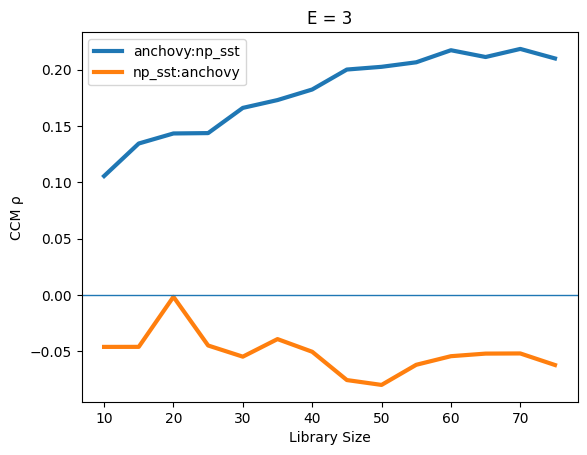

In [96]:
# let's use E = 3 
output_ccm=CCM( dataFrame = data, E = 3, 
     columns = "anchovy", target = "np_sst",
     libSizes = "10 75 5", sample = 100, includeData=True, showPlot = True, verbose=True);

In [97]:
output_ccm

{'LibMeans':     LibSize  anchovy:np_sst  np_sst:anchovy
 0        10        0.105644       -0.045971
 1        15        0.134533       -0.045934
 2        20        0.143449       -0.001510
 3        25        0.143770       -0.044729
 4        30        0.166139       -0.054637
 5        35        0.173085       -0.039042
 6        40        0.182463       -0.050281
 7        45        0.200173       -0.075399
 8        50        0.202594       -0.079713
 9        55        0.206607       -0.061847
 10       60        0.217315       -0.054219
 11       65        0.211290       -0.051919
 12       70        0.218472       -0.051782
 13       75        0.210020       -0.062044,
 'PredictStats1':     LibSize      rho      MAE     RMSE
 0        10  0.28073  1.56293  1.15708
 1        10  0.16445  0.83660  1.48580
 2        10  0.38871  1.32010  1.07884
 3        10  0.05406  1.86110  1.09826
 4        10  0.09665  1.55971  1.13057
 ..      ...      ...      ...      ...
 95       75  0

CCM: Validate()
Simplex: Validate()
Simplex Validate(): Set knn = 6
Simplex: CreateIndices() 
Simplex: Validate()
Simplex Validate(): Set knn = 6
Simplex: CreateIndices() 
Simplex: EmbedData()
Simplex: RemoveNan()
Simplex: EmbedData()
Simplex: RemoveNan()
CCM: Project()
CCM: CrossMap()
CCM: CrossMap()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()Simplex: FindNeighbors()

Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors

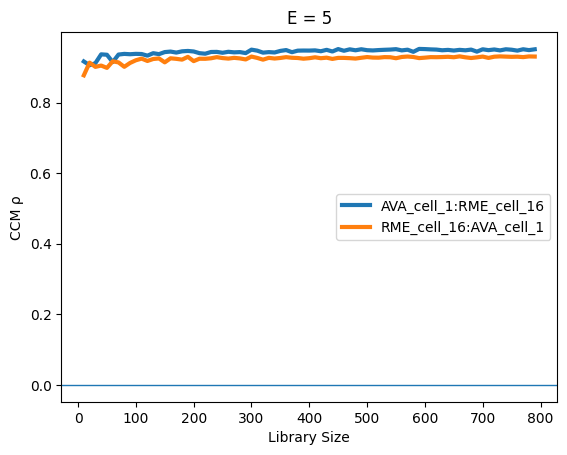

In [105]:
# using worm 0 data from different cell clusters
output_ccm_AVA=CCM( dataFrame = w_0, E = 5, 
     columns = "AVA_cell_1", target = "RME_cell_16",
     libSizes = "10 799 10 ", sample = 1, includeData=True, showPlot = True, verbose=True);

### Multivariate embedding prediction
you can use here more than one column for the prediction, making a Multivariate embedding: 
If there are multiple columns and embedded is false, each column is time-delay embedded to dimension E creating an N-columns * E dimensional "mixed" embedding. If embedded is true, no time-delay embedding is done, creating a multivariate embedding of the speficied columns. 

Parameters::Validate(): Set knn = 3 (E+1) for Simplex. 
cppEDM Version 1.14.3 2023-07-05
CCM() multiple columns/target.
CCM(): embedding columns: anchovy sardine 
CCM(): embedding target:  np_sst 
CrossMap(): Simplex cross mapping from anchovy to np_sst  E=2  knn=3  Library: [ 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ] 

CrossMap(): Simplex cross mapping from np_sst to anchovy  E=1  knn=3  Library: [ 10 15 20 25 30 35 40 45 50 55 60 65 70 75 ] 



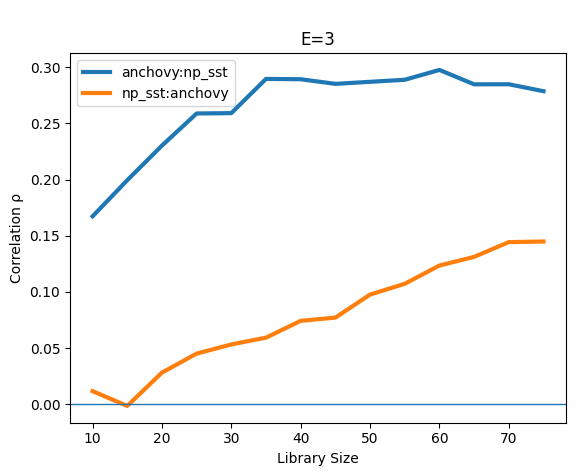

In [28]:
# with embedding True, using both anchovy and sardine columns multivariate embedding
output_ccm=CCM( dataFrame = data, E = 3, 
     columns = "anchovy, sardine", target = "np_sst",
     libSizes = "10 75 5", sample = 100, embedded=True, 
     showPlot = True, verbose=True)

In [29]:
data

year   anchovy   sardine   sio_sst    np_sst
0   1929 -0.007599  1.770090 -0.352393 -0.347846
1   1930 -0.009602 -1.151520  0.001149  0.328734
2   1931 -0.008444 -1.420680  1.068220  1.610270
3   1932 -0.008354  0.112222  0.531857  1.265340
4   1933 -0.007750  1.515550 -0.552058  0.040046
..   ...       ...       ...       ...       ...
73  2002 -0.741992  0.138018  0.658063 -1.186420
74  2003 -0.157825 -0.360649  0.634573 -1.342620
75  2004  0.249897  0.189861  1.219800 -0.530206
76  2005  0.213121 -0.130771  1.749450 -0.757965
77  2006  0.073090  0.229798  2.028610 -0.583363

[78 rows x 5 columns]

CCM: Validate()
Simplex: Validate()
Simplex Validate(): Set knn = 3
Simplex: CreateIndices() 
Simplex: Validate()
Simplex Validate(): Set knn = 2
Simplex: CreateIndices() 
Simplex: EmbedData()
Simplex: RemoveNan()
Simplex: EmbedData()
Simplex: RemoveNan()
CCM: Project()
CCM: CrossMap()
CCM: CrossMap()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors()
Simplex: FindNeighbors

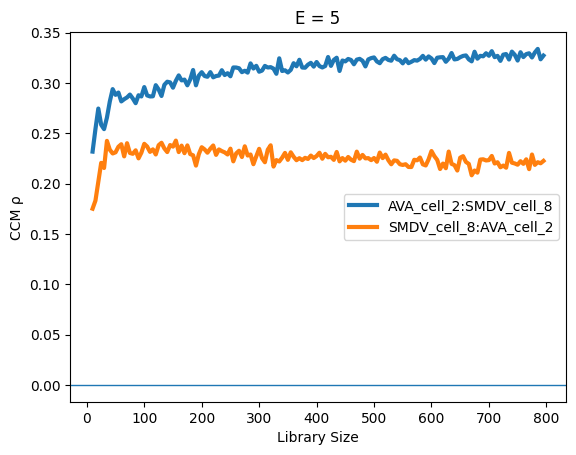

In [111]:
# with embedding True, using both anchovy and sardine columns multivariate embedding
output_ccm=CCM( dataFrame = w_0, E = 5, 
     columns = ["AVA_cell_2", "RME_cell_16"], target = "SMDV_cell_8",
     libSizes = "10 799 5", sample = 100, embedded=True, 
     showPlot = True, verbose=True)

### CCM matrix 
if you have multiple variables and want to evaluate causal relationship between each pair of variables,
you can use the CCM function in a for loop as follows:

In [119]:
CCM_matrix=np.zeros((len(data.columns[1:]),len(data.columns[1:])))

for i in range(len(data.columns[1:])):
    for j in range(len(data.columns[1:])):

        # here I use E=3 and a fixed library size to make it simple
        out_ccm=CCM(dataFrame = data,  E=3, libSizes="70", sample=1,
                        columns = data.columns[i+1], target=data.columns[j+1])
        
        value = out_ccm[data.columns[i+1] + ':' + data.columns[j+1]].values
        CCM_matrix[j, i] = value.item()  

        value = out_ccm[data.columns[j+1] + ':' + data.columns[i+1]].values
        CCM_matrix[i, j] = value.item()  


In [121]:
CCM(dataFrame = data,  E=3, libSizes="70", sample=1,
                        columns = data.columns[1], target=data.columns[-1])

LibSize  anchovy:np_sst  np_sst:anchovy
0       70         0.21291        -0.17567

Text(0, 0.5, 'From')

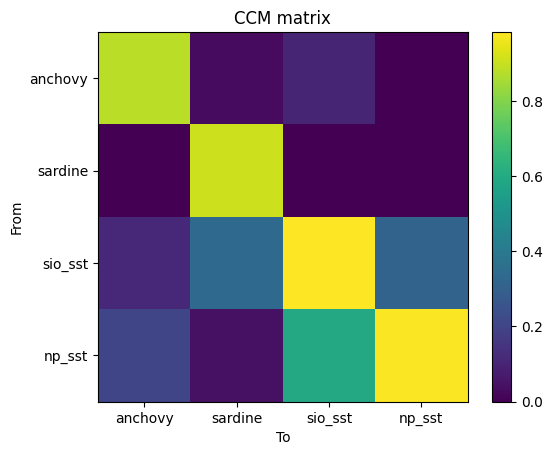

In [126]:
# plot your CCM matrix
plt.figure()
CCM_matrix[CCM_matrix<0]=0
plt.imshow(CCM_matrix)
plt.clim([0,np.max(CCM_matrix)])
plt.colorbar()
plt.xticks(np.arange(0, len(data.columns[1:])), data.columns[1:])
plt.yticks(np.arange(0, len(data.columns[1:])), data.columns[1:])
plt.title('CCM matrix')
plt.xlabel('To')
plt.ylabel('From')

In [ ]:
data = data

CCM_matrix=np.zeros((len(data.columns[1:]),len(data.columns[1:])))

for i in range(len(data.columns[1:])):
    for j in range(len(data.columns[1:])):

        # here I use E=3 and a fixed library size to make it simple
        out_ccm=CCM(dataFrame = data,  E=3, libSizes="70", sample=1,
                        columns = data.columns[i+1], target=data.columns[j+1])
        
        value = out_ccm[data.columns[i+1] + ':' + data.columns[j+1]].values
        CCM_matrix[j, i] = value.item()  

        value = out_ccm[data.columns[j+1] + ':' + data.columns[i+1]].values
        CCM_matrix[i, j] = value.item()  


In [138]:
CCM_matrix=np.zeros((len(w_0.columns[1:]),len(w_0.columns[1:])))
k = 0
n = 0
for i in w_0.columns[1:]:
    
    for j in w_0.columns[1:]:
        print(i,j)
        # here I use E=3 and a fixed library size to make it simple
        out_ccm=CCM(dataFrame = w_0,  E=5, libSizes="800", sample=1,
                        columns = i, target=j)
        
        value = out_ccm[i + ':' + j].values
        CCM_matrix[n, k] = value.item()  


        value = out_ccm[j + ':' + i].values
        CCM_matrix[k, n] = value.item()  

        n = n +1
    k = k +1

AVA_cell_1 AVA_cell_1
AVA_cell_1 AVA_cell_2
AVA_cell_1 AVA_cell_10
AVA_cell_1 AVA_cell_18
AVA_cell_1 AVA_cell_32
AVA_cell_1 AVA_cell_42
AVA_cell_1 AVA_cell_52
AVA_cell_1 AVA_cell_55
AVA_cell_1 AVA_cell_67
AVA_cell_1 AVA_cell_82
AVA_cell_1 RME_cell_16
AVA_cell_1 RME_cell_27
AVA_cell_1 RME_cell_29
AVA_cell_1 RME_cell_43
AVA_cell_1 RME_cell_46
AVA_cell_1 RME_cell_50
AVA_cell_1 RME_cell_56
AVA_cell_1 RME_cell_60
AVA_cell_1 RME_cell_61
AVA_cell_1 RME_cell_74
AVA_cell_1 RME_cell_79
AVA_cell_1 SMDD_cell_40
AVA_cell_1 SMDV_cell_8
AVA_cell_1 SMDV_cell_70
AVA_cell_2 AVA_cell_1


IndexError: index 24 is out of bounds for axis 0 with size 24

In [139]:
CCM_matrix = np.zeros((len(w_0.columns[1:]), len(w_0.columns[1:])))

for k, i in enumerate(w_0.columns[1:]):  # Use enumerate to manage k
    n = 0  # Reset n to 0 at the start of each new row processing
    for j in w_0.columns[1:]:
        print(i, j)  # Printing current column pair being processed
        out_ccm = CCM(dataFrame=w_0, E=5, libSizes="800", sample=1,
                      columns=i, target=j)
        
        # Assuming out_ccm is a DataFrame with the expected results
        value = out_ccm[i + ':' + j].values
        CCM_matrix[k, n] = value.item()  # Update using k for row and n for column

        value = out_ccm[j + ':' + i].values
        CCM_matrix[n, k] = value.item()  # Symmetric update

        n += 1  # Increment column index after each inner loop

AVA_cell_1 AVA_cell_1
AVA_cell_1 AVA_cell_2
AVA_cell_1 AVA_cell_10
AVA_cell_1 AVA_cell_18
AVA_cell_1 AVA_cell_32
AVA_cell_1 AVA_cell_42
AVA_cell_1 AVA_cell_52
AVA_cell_1 AVA_cell_55
AVA_cell_1 AVA_cell_67
AVA_cell_1 AVA_cell_82
AVA_cell_1 RME_cell_16
AVA_cell_1 RME_cell_27
AVA_cell_1 RME_cell_29
AVA_cell_1 RME_cell_43
AVA_cell_1 RME_cell_46
AVA_cell_1 RME_cell_50
AVA_cell_1 RME_cell_56
AVA_cell_1 RME_cell_60
AVA_cell_1 RME_cell_61
AVA_cell_1 RME_cell_74
AVA_cell_1 RME_cell_79
AVA_cell_1 SMDD_cell_40
AVA_cell_1 SMDV_cell_8
AVA_cell_1 SMDV_cell_70
AVA_cell_2 AVA_cell_1
AVA_cell_2 AVA_cell_2
AVA_cell_2 AVA_cell_10
AVA_cell_2 AVA_cell_18
AVA_cell_2 AVA_cell_32
AVA_cell_2 AVA_cell_42
AVA_cell_2 AVA_cell_52
AVA_cell_2 AVA_cell_55
AVA_cell_2 AVA_cell_67
AVA_cell_2 AVA_cell_82
AVA_cell_2 RME_cell_16
AVA_cell_2 RME_cell_27
AVA_cell_2 RME_cell_29
AVA_cell_2 RME_cell_43
AVA_cell_2 RME_cell_46
AVA_cell_2 RME_cell_50
AVA_cell_2 RME_cell_56
AVA_cell_2 RME_cell_60
AVA_cell_2 RME_cell_61
AVA_cell_2 RM

In [140]:
out_ccm

LibSize  SMDV_cell_70:SMDV_cell_70
0      800                    0.99547

In [141]:
CCM_matrix

array([[0.99844, 0.90137, 0.76886, 0.90356, 0.9256 , 0.86962, 0.75604,
        0.89977, 0.74943, 0.85303, 0.94823, 0.92559, 0.75381, 0.91491,
        0.88278, 0.8008 , 0.93598, 0.88146, 0.95327, 0.81622, 0.94568,
        0.45363, 0.41283, 0.50355],
       [0.9437 , 0.99816, 0.79955, 0.96336, 0.86836, 0.80211, 0.83403,
        0.95364, 0.75386, 0.91871, 0.96479, 0.9466 , 0.85627, 0.86978,
        0.86813, 0.81366, 0.90721, 0.864  , 0.90996, 0.82888, 0.96299,
        0.58133, 0.44765, 0.4925 ],
       [0.89261, 0.89313, 0.99576, 0.91635, 0.85929, 0.77449, 0.82553,
        0.91199, 0.93537, 0.90539, 0.94402, 0.94327, 0.91802, 0.88378,
        0.96084, 0.84745, 0.8558 , 0.91631, 0.88749, 0.89963, 0.93329,
        0.45863, 0.33443, 0.42527],
       [0.92957, 0.94142, 0.76678, 0.99732, 0.90729, 0.88035, 0.87267,
        0.91863, 0.7631 , 0.9533 , 0.9699 , 0.94068, 0.73219, 0.84379,
        0.81791, 0.81182, 0.91393, 0.80768, 0.87223, 0.78424, 0.96668,
        0.53081, 0.41162, 0.48729],
    

Text(0, 0.5, 'From')

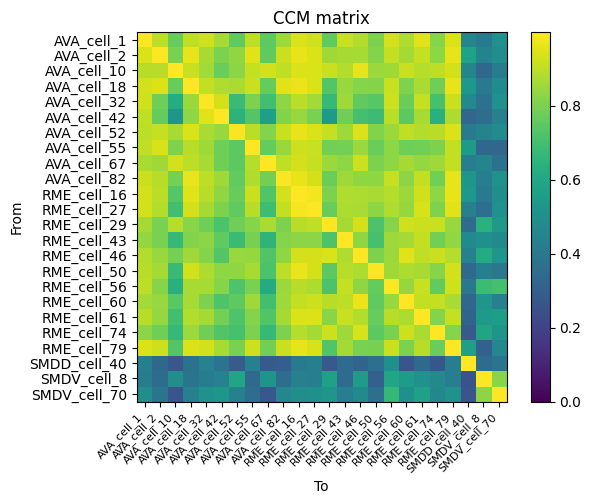

In [143]:
# plot your CCM matrix
plt.figure()
CCM_matrix[CCM_matrix<0]=0
plt.imshow(CCM_matrix)
plt.clim([0,np.max(CCM_matrix)])
plt.colorbar()
plt.xticks(np.arange(0, len(w_0.columns[1:])), w_0.columns[1:])
plt.xticks(rotation=45, ha='right', fontsize=8) 
plt.yticks(np.arange(0, len(w_0.columns[1:])), w_0.columns[1:])
plt.title('CCM matrix')
plt.xlabel('To')
plt.ylabel('From') 


In [127]:
w_0.columns

Index(['Time', 'AVA_cell_1', 'AVA_cell_2', 'AVA_cell_10', 'AVA_cell_18',
       'AVA_cell_32', 'AVA_cell_42', 'AVA_cell_52', 'AVA_cell_55',
       'AVA_cell_67', 'AVA_cell_82', 'RME_cell_16', 'RME_cell_27',
       'RME_cell_29', 'RME_cell_43', 'RME_cell_46', 'RME_cell_50',
       'RME_cell_56', 'RME_cell_60', 'RME_cell_61', 'RME_cell_74',
       'RME_cell_79', 'SMDD_cell_40', 'SMDV_cell_8', 'SMDV_cell_70'],
      dtype='object')

In [118]:
data.columns

Index(['year', 'anchovy', 'sardine', 'sio_sst', 'np_sst'], dtype='object')

### Resources:
I recommend you to read this paper https://link.springer.com/article/10.1007/s11284-017-1469-9

Feel free to email me if you have questions! acamassa@salk.edu

